In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import csv

#### Script Description
Read in the data file from Cosmic Muon measurements that pass Leslie's cuts
and bin them into a histogram. 

Convert the histogram to a dataframe to spit out into a csv file. Also add in
the bin edges of the histogram to the csv file. 

[0.         0.2026834  0.40536679 0.60805019 0.81073359 1.01341699
 1.21610038 1.41878378 1.62146718 1.82415057 2.02683397 2.22951737
 2.43220076 2.63488416 2.83756756 3.04025096 3.24293435 3.44561775
 3.64830115 3.85098454 4.05366794 4.25635134 4.45903473 4.66171813
 4.86440153 5.06708493 5.26976832 5.47245172 5.67513512 5.87781851
 6.08050191 6.28318531]
[0.         0.05235988 0.10471976 0.15707963 0.20943951 0.26179939
 0.31415927 0.36651914 0.41887902 0.4712389  0.52359878 0.57595865
 0.62831853 0.68067841 0.73303829 0.78539816 0.83775804 0.89011792
 0.9424778  0.99483767 1.04719755 1.09955743 1.15191731 1.20427718
 1.25663706 1.30899694 1.36135682 1.41371669 1.46607657 1.51843645
 1.57079633]


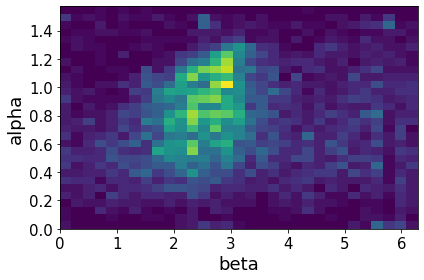

In [152]:

pi = np.pi

# Bin edges
binEdges_beta = np.linspace(0-0.21666156/2.0, 2*np.pi-0.21666156/2.0,30)

binEdges_alpha = np.linspace(0.4-0.02/2.0, 1-0.02/2.0, 31)
binEdges_alpha = binEdges_alpha[::-1]
binEdges_alpha = np.arccos(binEdges_alpha)

binEdges_alpha = np.linspace(0, pi/2, 31)
binEdges_beta = np.linspace(0, 2*pi, 32)


print(binEdges_beta)
print(binEdges_alpha)

data   = pd.read_hdf("MeasuredMuonsFromData.h5") # Read in data

# Add 220deg to beta
data["beta"] = data["beta"] + pi*(210)/180 

# # Account for rotational symmetry
data.loc[data.beta>=pi*2, "beta"] = data["beta"] - pi*2
data.loc[data.beta<=0, "beta"] = data["beta"] + pi*2

# # Reverse direction of beta to opposite direction
data["beta"] = -1*(data["beta"] - pi*2)

hist_data = plt.hist2d(data["beta"], data["alpha"], bins=[binEdges_beta, binEdges_alpha]) 
# hist_data= plt.hist2d(data["beta"], data["alpha"], bins = 100) 
plt.xlabel("beta", fontsize=18)
plt.ylabel("alpha", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.tight_layout()
plt.show()


In [153]:
# Now convert the histogram to dataframe
rows = []
columns = []

# Get the Bin Centers to loop over
for indx in range(0, len(hist_data[1])-1):
    rows.append( (hist_data[1][indx+1] - hist_data[1][indx])/2.0 + hist_data[1][indx])
    # print(rows[indx])

for indx in range(0, len(hist_data[2])-1):
    columns.append( (hist_data[2][indx+1] - hist_data[2][indx])/2.0 + hist_data[2][indx])
    # print(columns[indx])

# Loop over the histogram bins and create three arrays 
# print(len(hist_data[0][:]), len(rows), len(columns))

intensity = []
beta      = []
alpha     = []

# Bin edges
binCentres_beta = np.linspace(0, 2*np.pi,30)

binCentres_alpha = np.linspace(0.4, 1, 31)
binCentres_alpha = binCentres_alpha[::-1]
binCentres_alpha = np.arccos(binCentres_alpha)

binCentres_alpha = np.linspace(0, pi/2, 31)
binCentres_beta = np.linspace(0, 2*pi, 32)


print(len(binCentres_beta), len(hist_data[0][0]))

for y in range(0, len(hist_data[0])):
    for x in range(0, len(hist_data[0][y])):
        # print(hist_data[0][y][x], rows[y], columns[x])

        if (binCentres_alpha[x] != 0):
            intensity.append(hist_data[0][y][x])
            beta.append(binCentres_beta[y])
            alpha.append(binCentres_alpha[x])
    
    # print(" ")

dict_ = {'Intenisty':intensity, 'azimuth': beta, 'zenith': alpha}

dataframe = pd.DataFrame(dict_)
# display(dataframe)

32 30


In [154]:
# Write the data from hdf5 format to csv for reading into nexus
filepath = Path('MeasuredMuonsFromData.csv')  
dataframe.to_csv(filepath, index = False, header = False)  

# Write the bins to file 

with open(r'MeasuredMuonsFromData.csv', 'a') as f:
    writer = csv.writer(f)
    
    # Write the alpha bin edges
    for i in range(len(binCentres_alpha)):
        writer.writerow(['zenith', binCentres_alpha[i]])

    # Write the alpha bin edges
    for i in range(len(binCentres_beta)):
        writer.writerow(['azimuth',binCentres_beta[i]])

